In [1]:
from filtering_functions import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.base import clone
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import CCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

import warnings

imput_file_path = "/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/vdjdb_full.txt"
data = pd.read_csv(imput_file_path, sep='\t')
df = pd.DataFrame(data)
df_cleaned = preprocess_data(df, relevant_columns=None, drop_duplicates=True)


/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_55812/1787703856.py:19: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(imput_file_path, sep='\t')


testing with dash_mouse as its a small dataset

In [24]:
df_slim = pd.read_csv('/Users/joesouber/Downloads/df_slim.csv')
df_slim = pd.DataFrame(df_slim)
rename_columns = {'cdr3_b_aa': 'cdr3.beta', 'v_b_gene': 'v.beta'}
df_slim = df_slim.rename(columns=rename_columns)
df_slim


,cdr3_a_aa,v_a_gene,j_a_gene,cdr3.beta,v.beta,j_b_gene,species,antigen.gene,antigen.epitope
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef,FLKEKGGL
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef,FLKEKGGL
2,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef,FLKEKGGL
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,Nef,FLKEKGGL
4,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef,FLKEQGGL
...,...,...,...,...,...,...,...,...,...
2960,CIALNARLMF,TRAV26-1*01,TRAJ31*01,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,HomoSapiens,Gluten,PQPELPYPQPQL
2961,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,HomoSapiens,Gluten,FPQPEQPFPWQP
2962,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,Gluten,FPQPEQPFPWQP
2963,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,Gluten,QLQPFPQPELPY


In [25]:
df_slim = pd.read_csv('/Users/joesouber/Downloads/filtered_df.csv')
df_slim = pd.DataFrame(df_slim)
df_slim

,cdr3_a_aa,v_a_gene,j_a_gene,cdr3.beta,v.beta,j_b_gene,species,antigen.gene,antigen.epitope
0,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,CASSPQGLGTEAFF,TRBV28*01,TRBJ1-1*01,HomoSapiens,MLANA,ELAGIGILTV
1,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,HomoSapiens,M,GILGFVFTL
2,CALSGFYNTDKLIF,TRAV19*01,TRAJ34*01,CASPGLAGEYEQYF,TRBV6-1*01,TRBJ2-7*01,HomoSapiens,BZLF1,LPEPLPQGQLTAY
3,CAVQASGGSYIPTF,TRAV1-2*01,TRAJ6*01,CATGTGDSNQPQHF,TRBV10-3*01,TRBJ1-5*01,HomoSapiens,BZLF1,EPLPQGQLTAY
4,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,HomoSapiens,M,GILGFVFTL
...,...,...,...,...,...,...,...,...,...
2268,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,CASSALVAFSTDTQYF,TRBV6-4*01,TRBJ2-3*01,HomoSapiens,Spike,QYIKWPWYI
2269,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,CASSSLAGEVNEQFF,TRBV7-2*01,TRBJ2-1*01,HomoSapiens,Spike,QYIKWPWYI
2270,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,CASSSYTQRGLDYTGELFF,TRBV27*01,TRBJ2-2*01,HomoSapiens,Spike,QYIKWPWYI
2271,CAMREGQGNAGNMLTF,TRAV14/DV4*01,TRAJ39*01,CASSQDYWGGGADTQYF,TRBV4-1*01,TRBJ2-3*01,HomoSapiens,Spike,QYIKWPWYI


In [6]:
dash_mouse_file_path = "/Users/joesouber/Downloads/Dash_mouse (1).csv"
dash_mouse = pd.read_csv(dash_mouse_file_path, sep=',')
dash_mouse_df = pd.DataFrame(dash_mouse)
rename_columns = {'cdr3b': 'cdr3.beta', 'vb_gene': 'v.beta', 'epitope':'antigen.epitope'}
dash_mouse_df = dash_mouse_df.rename(columns=rename_columns)
dash_mouse_df_cleaned = dash_mouse_df.dropna(subset=['cdr3.beta'])
dash_mouse_df_cleaned = dash_mouse_df_cleaned.drop_duplicates()
dash_mouse_df_cleaned.reset_index(drop=True, inplace=True)
dash_mouse_df_cleaned

,antigen.epitope,v.beta,cdr3.beta
0,PA,TRBV13-1*02,CASSDFDWGGDAETLYF
1,PA,TRBV29*01,CASSPDRGEVFF
2,PA,TRBV29*01,CASTGGGAPLF
3,PA,TRBV2*01,CASSQDPGDYEQYF
4,PA,TRBV29*01,CASSLGGENTLYF
...,...,...,...
1233,M45,TRBV12-1*01,CASSLGGQDTQYF
1234,M45,TRBV19*03,CASRYRGDNQAPLF
1235,M45,TRBV13-3*01,CASSDWTSQAPLF
1236,PA,TRBV29*01,CASSGPEVFF


# SETE functions: making feature matrix based on cdr3 chain. kmer approach.



In [36]:

# Function to generate k-mers from a single sequence
def generate_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Assuming the function generate_kmers is defined as before

def create_features_matrix(df, include_alpha=True, include_beta=True, alpha_col='cdr3.alpha', beta_col='cdr3.beta', label_col='antigen.epitope', k=3):
    # Filter rows where label is missing
    filtered_df = df.dropna(subset=[label_col])
    
    # Initialize documents for CountVectorizer and k-mer count dictionary
    kmer_docs = []
    kmer_count_dict = {}
    
    # Process sequences based on inclusion flags
    for _, row in filtered_df.iterrows():
        kmers = []
        if include_alpha and pd.notna(row[alpha_col]):
            alpha_seq = row[alpha_col]
            kmers += generate_kmers(alpha_seq, k)
        if include_beta and pd.notna(row[beta_col]):
            beta_seq = row[beta_col]
            kmers += generate_kmers(beta_seq, k)
        
        # Concatenate k-mers into a single string for vectorization
        kmer_docs.append(' '.join(kmers))
        
        # Count occurrences of each k-mer
        for kmer in kmers:
            kmer_count_dict[kmer] = kmer_count_dict.get(kmer, 0) + 1
    
    # Vectorize k-mer documents into a feature matrix
    vectorizer = CountVectorizer(analyzer='word', token_pattern=r"(?u)\b\w+\b")
    X = vectorizer.fit_transform(kmer_docs).toarray()
    
    # Create a mapping from epitope names to integers
    unique_epitopes = filtered_df[label_col].unique()
    epitope_to_int = {epitope: i for i, epitope in enumerate(unique_epitopes)}
    
    # Transform labels into integers based on the mapping
    y = filtered_df[label_col].map(epitope_to_int).values
    
    # Get unique k-mer names used in the matrix
    feature_names = vectorizer.get_feature_names_out()
    epitope_names = list(epitope_to_int.keys())
    # Return the adjusted outputs
    return X, y, feature_names, kmer_count_dict, epitope_names




# Create the feature matrix, labels, and k-mer list based on specified chains
#X, y, kmer_names, kmer_count_dict, epitope_names = create_features_matrix(df_cleaned, include_alpha=False, include_beta=True, alpha_col='cdr3.alpha', beta_col='cdr3.beta', label_col='antigen.epitope', k=3)


# hopefully below code will work eventually to output AUC_ROC, although right now the dataset is too large for the code to run.

In [37]:
import numpy as np
import pandas as pd
import collections
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from SETE import *
from itertools import cycle
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.base import clone
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import CCA

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier

import warnings

warnings.filterwarnings('ignore')

In [38]:
def _cal_micro_ROC(y_test, y_score):
    """Calculate the micro ROC value"""
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    return fpr, tpr, auc(fpr, tpr)


def _cal_macro_ROC(y_test, y_score, fpr, tpr, n_classes):
    """Calculate the macro ROC value"""
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    return all_fpr, mean_tpr, auc(all_fpr, mean_tpr)


def _plot_roc_curves(fpr, tpr, roc_auc, epi_list, title):
    """PLot the ROC curve"""
    mean_fpr = np.linspace(0, 1, 200)
    tprs = list()
    aucs = list()
    for i in range(len(epi_list)):
        tprs.append(interp(mean_fpr, fpr[i], tpr[i]))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc[i])
        cur_auc = round(roc_auc[i], 3)
        plt.plot(fpr[i], tpr[i], lw=1, alpha=0.5, label='{0}({1})'.format(epi_list[i], str(cur_auc)))

    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(tprs, axis=0)
    plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC({})'.format(round(mean_auc, 3)), lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='gray', alpha=.2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()


def _cal_roc_auc(y_test, y_score, y_pred, epi_list, draw_roc_curve=True, title="ROC curves"):
    """"Calculate the AUROC value and draw the ROC curve."""
    fpr = dict()
    tpr = dict()
    precision = list()
    recall = list()
    roc_auc = dict()
    y_test = label_binarize(y_test, classes=np.arange(len(epi_list)))
    y_pred = label_binarize(y_pred, classes=np.arange(len(epi_list)))
    for i in range(len(epi_list)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        precision.append(precision_score(y_test[:, i], y_pred[:, i]))
        recall.append(recall_score(y_test[:, i], y_pred[:, i]))

    # micro-average ROC
    fpr["micro"], tpr["micro"], roc_auc["micro"] = _cal_micro_ROC(y_test, y_score)

    # macro-average ROC
    fpr["macro"], tpr["macro"], roc_auc["macro"] = _cal_macro_ROC(y_test, y_score, fpr, tpr, len(epi_list))

    # plot all ROC curves
    if draw_roc_curve:
        _plot_roc_curves(fpr, tpr, roc_auc, epi_list, title)

    return roc_auc, np.mean(precision), np.mean(recall)


def predict_auc(X, y, classifier, cv, epi_list, draw_roc_curve=True, title="ROC curves"):
    auc_dict = {}
    acc_list, precision_list, recall_list = [], [], []
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=666)
    cur_fold = 1
    for train_index, test_index in skf.split(X, y):
        # split cross-validation folds
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, X_test = pca_analyse(X_train, X_test, 0.9)

        clf = clone(classifier)
        clf.fit(X_train, y_train)

        acc_list.append(clf.score(X_test, y_test))

        y_prob = clf.predict_proba(X_test)
        y_pred = clf.predict(X_test)

        auc_dict[cur_fold], precision, recall = _cal_roc_auc(y_test, y_prob, y_pred, epi_list, draw_roc_curve)

        precision_list.append(precision)
        recall_list.append(recall)
        cur_fold += 1

    return auc_dict, acc_list, precision_list, recall_list


def pca_analyse(X_train, X_test, rate=0.9):
    """Perform PCA for the train set and test set."""
    pca = PCA(n_components=rate).fit(X_train)
    return pca.transform(X_train), pca.transform(X_test)

In [40]:
X, y, feature_names, kmer_count_dict, epitope_names = create_features_matrix(df_slim, include_alpha=False, include_beta=True, alpha_col='cdr3.alpha', beta_col='cdr3.beta', label_col='antigen.epitope', k=3)

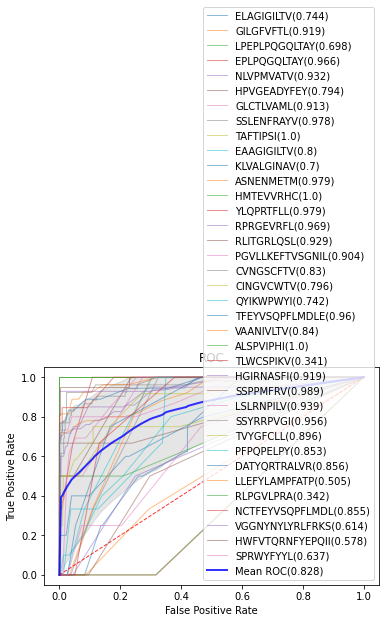

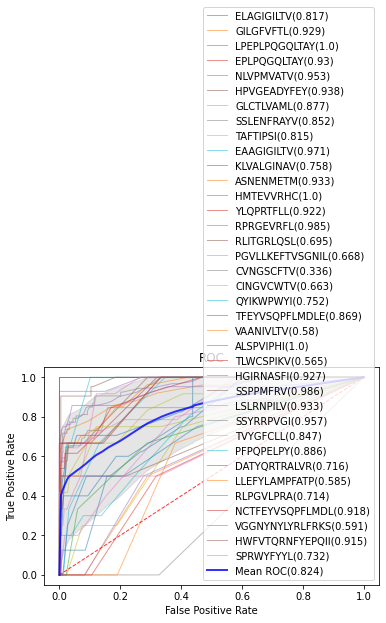

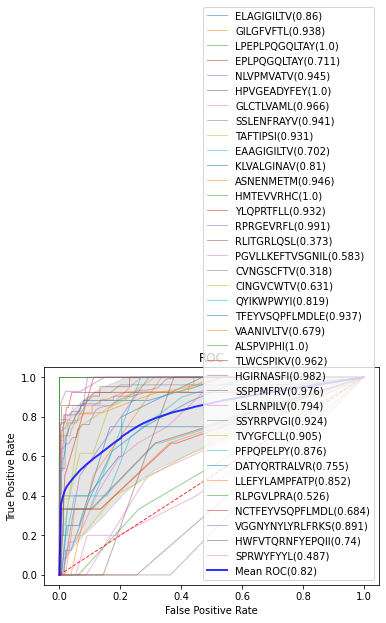

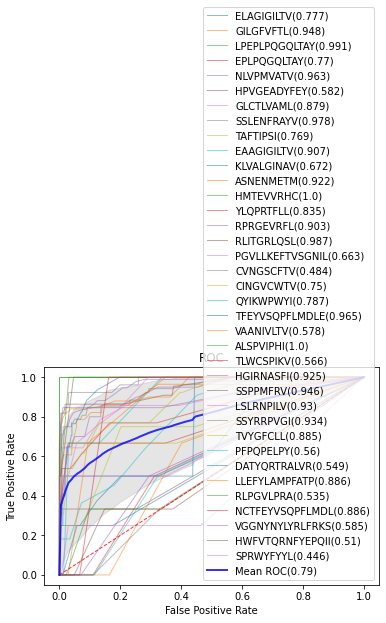

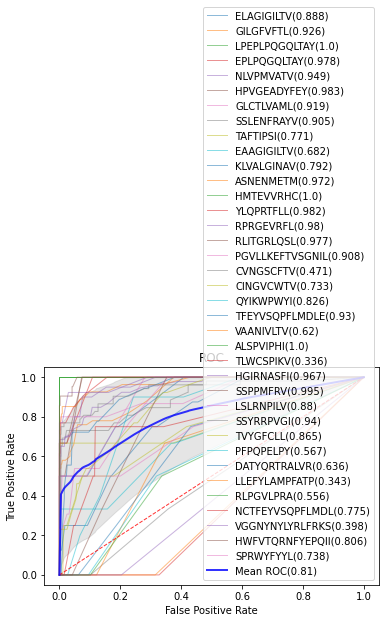

In [50]:
#classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
auc_result, acc, precision, recall = predict_auc(X, y, rf_classifier, 5, epitope_names, True)